In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
comments=pd.read_csv(r'D:\Certification\Data Analytics Real World Project - Python\1..Youtube\Youtube_project_shan_singh/UScomments - Copy.csv',error_bad_lines=False) 
comments.head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21000\1534895303.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv(r'D:\Certification\Data Analytics Real World Project - Python\1..Youtube\Youtube_project_shan_singh/UScomments - Copy.csv',error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Dell\AppData\Local\Temp\ipykernel_21000\1534895303.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r'D:\Certification\Data Analytics Real World Project - Python\1..Youtube\Youtube_project

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [3]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [4]:
comments.dropna(inplace=True)

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [7]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [ ]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
        
    

In [36]:
comments['polarity']=polarity

In [41]:
comments=comments.drop(['Polarity'],axis=1) ## to drop the Polarity complete coloumn

In [ ]:
comments.isnull().sum()

In [38]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      691375 non-null  object 
 1   comment_text  691375 non-null  object 
 2   likes         691375 non-null  object 
 3   replies       691375 non-null  object 
 4   polarity      691375 non-null  float64
dtypes: float64(1), object(4)
memory usage: 31.6+ MB


# did importing of the csv file,removing null value, sentiment analysis, checking for polarity and storing in the list  on 22-09-2022

In [39]:
comments_positive=comments[comments['polarity']==1]

In [40]:
comments_negative=comments[comments['polarity']==-1]

In [41]:
comments_negative.head(5)

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [42]:
!pip install wordcloud

In [43]:
from wordcloud import WordCloud,STOPWORDS

In [44]:
comments_negative[['comment_text','likes']]

comment_text likes
512     BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0
562     Well… The brain surgeon Ben Carson just proved...     0
952            WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0
1371                                       WTF BRUH!!!!!!     0
1391                      cheeseus christ thats insane!!!     0
...                                                   ...   ...
690788                                Like Kelly she evil     0
690865                     R U FUCKING KIDDING ME?!?!?!?!    11
691073           This is horribly offensive please report     0
691180  Sink holes looks terrifying sinkholes sink you...     0
691224  Trump talked to the president of US Virgin Isl...     0

[3508 rows x 2 columns]

In [62]:
total_negative_comments=' '.join(comments_negative['comment_text'])

In [64]:
total_negative_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

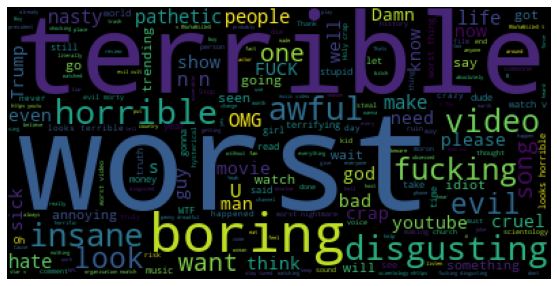

In [67]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

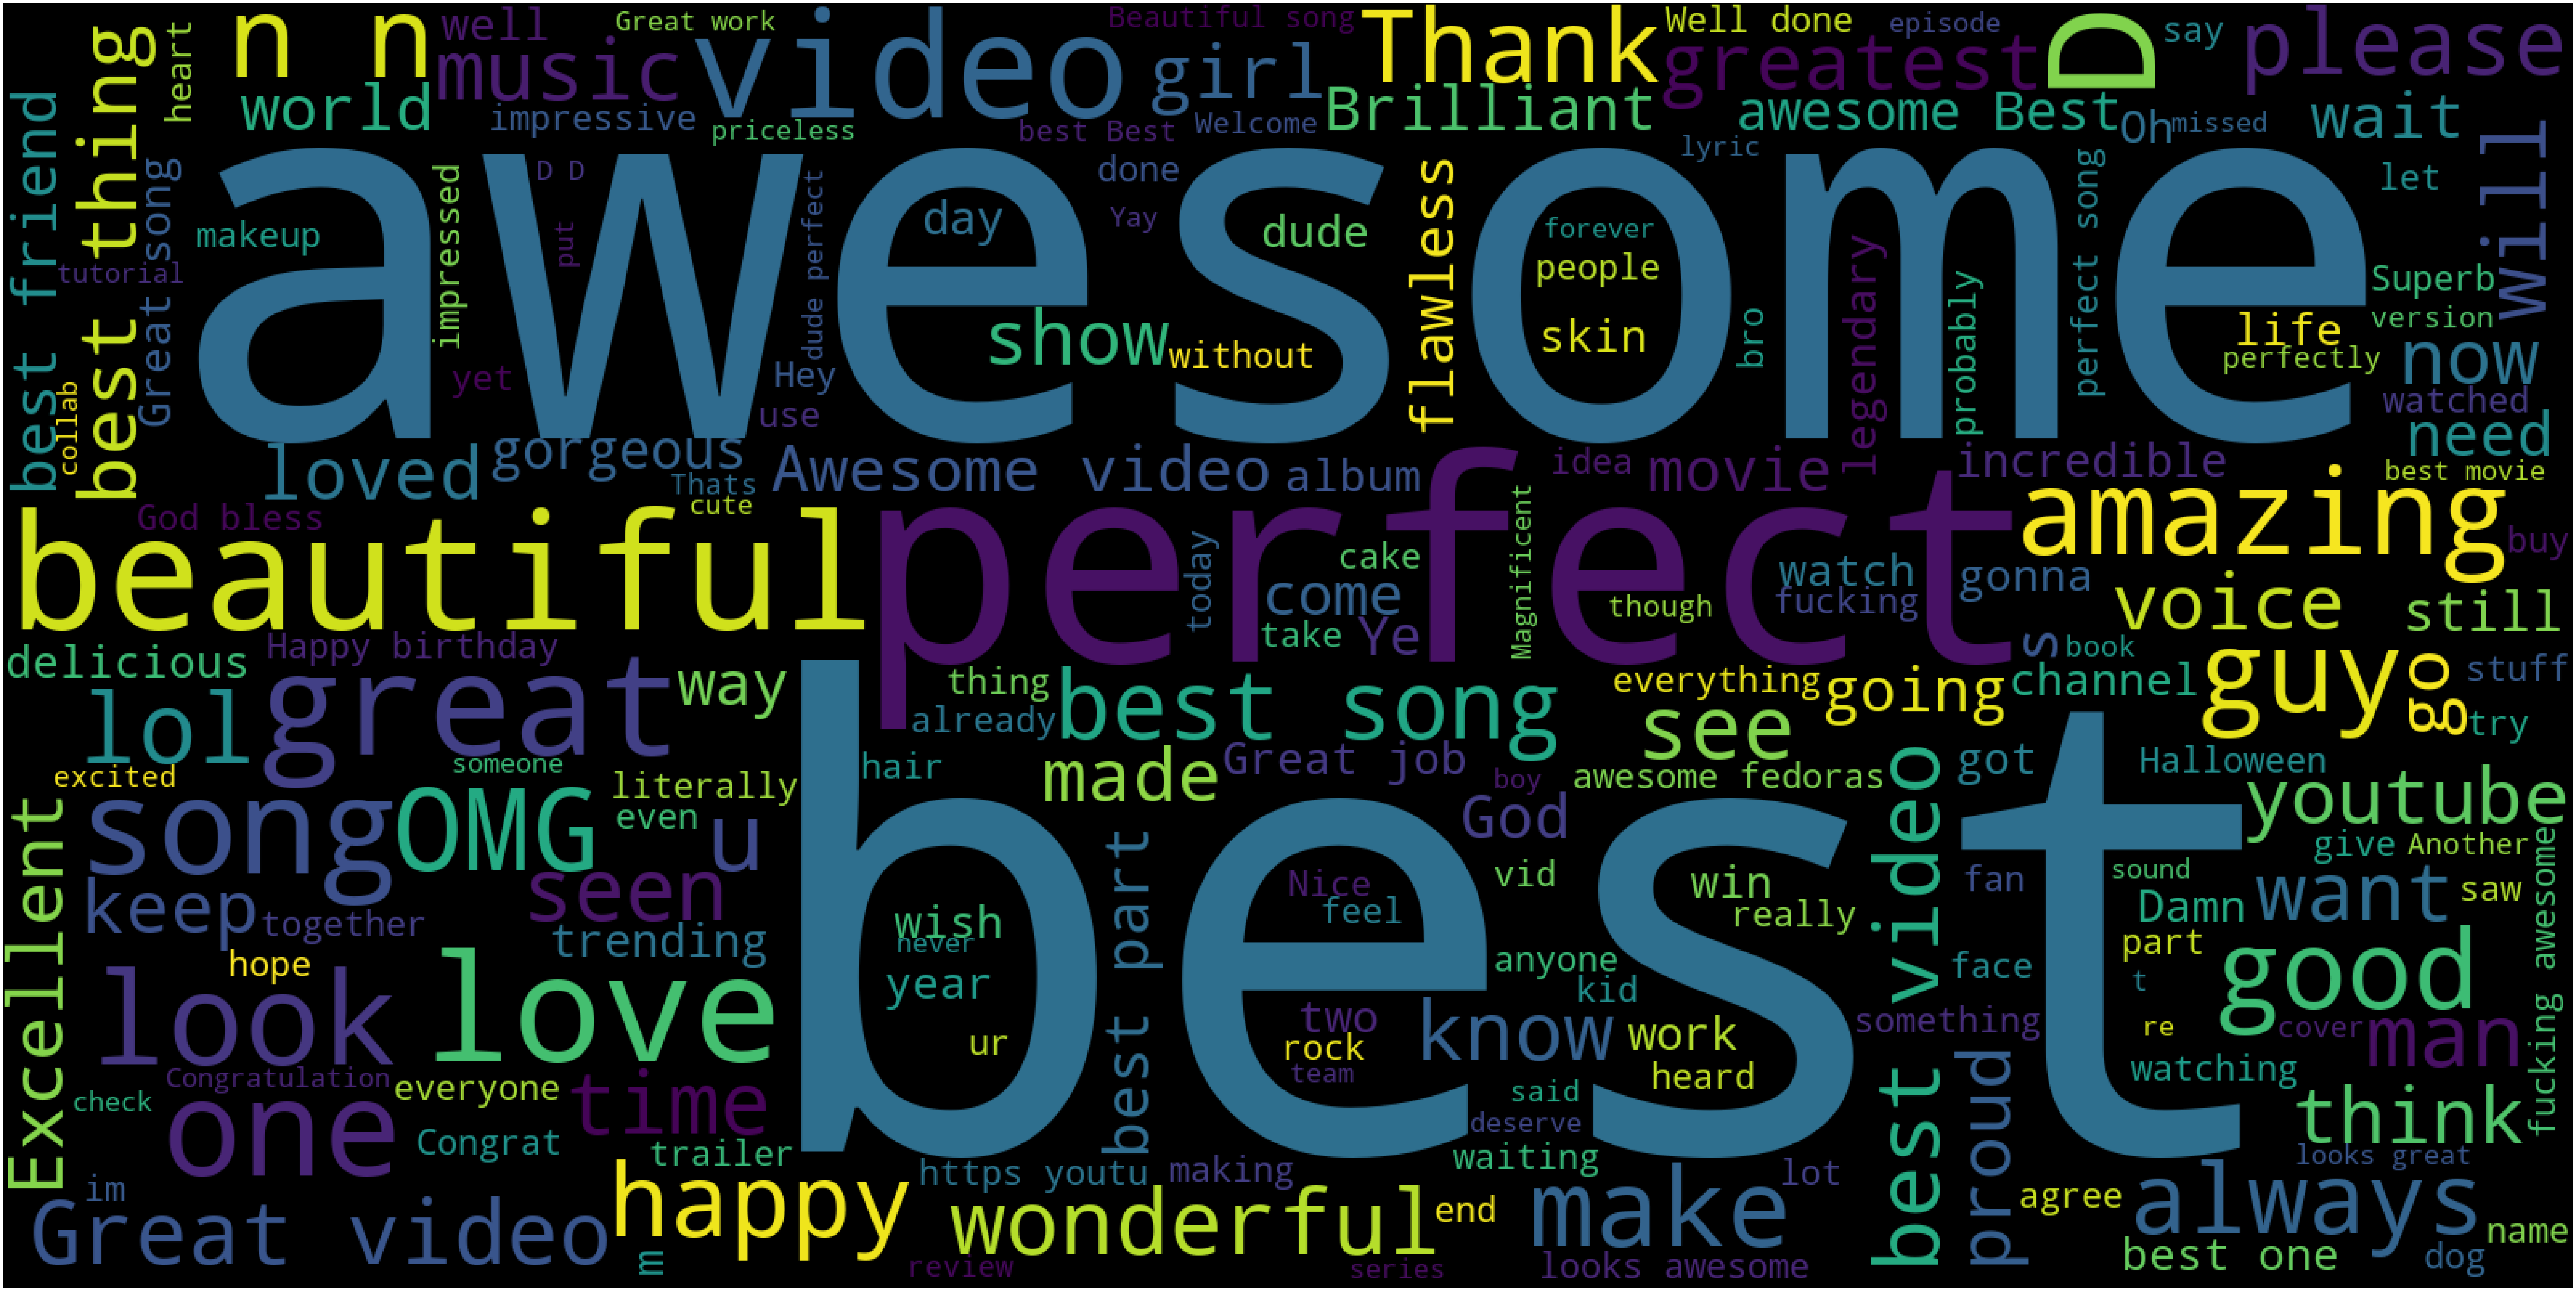

In [47]:
total_positive_comments=' '.join(comments_positive['comment_text'])
wordcloud_p=WordCloud(width=1600,height=800,stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(100,60))
plt.imshow(wordcloud_p)
plt.axis('off')

## Did Word cloud of youtube comments on 23-09-2022

In [72]:
comments.head(140)

video_id                                       comment_text likes  \
0    XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1    XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2    XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3    XpVt6Z1Gjjo                                MY FAN . attendance     3   
4    XpVt6Z1Gjjo                                         trending 😉     3   
..           ...                                                ...   ...   
135  cLdxuaxaQwc  Sticks and Stones may break my bones but words...     0   
136  cLdxuaxaQwc  Don't apologize. Political correctness is the ...     0   
137  cLdxuaxaQwc  I forgive you but man i can you blame people f...     0   
138  cLdxuaxaQwc              Social justice warriors need to chill     0   
139  cLdxuaxaQwc  As a Black American, I don't think it's that b...     0   

    replies  polarity  
0         0  0.000000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  0.000000  
..      ...       ...  
135       0  0.000000  
136       0 -0.068871  
137       0  0.000000  
138       0  0.033333  
139       0 -0.074074  

[140 rows x 5 columns]

In [3]:
!pip install emoji==2.1.0

  Using cached emoji-2.1.0-py3-none-any.whl
  Attempting uninstall: emoji
    Found existing installation: emoji 1.2.0
    Uninstalling emoji-1.2.0:
      Successfully uninstalled emoji-1.2.0


In [4]:
import emoji

In [5]:
emoji.__version__

'2.1.0'

In [25]:
em_list=[]
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.distinct_emoji_list(char):
            em_list.append(char)
        
        
        
        
    
       

In [48]:
len(em_list)

294549

In [15]:
from collections import Counter

In [58]:
Counter(em_list).most_common(10)[0][0]

'😂'

In [59]:
common_emoji=[]
for i in range(0,10):
    common_emoji.append(Counter(em_list).most_common(10)[i][0])
common_emoji
    

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [60]:
freq=[]
for i in range(0,10):
    freq.append(Counter(em_list).most_common(10)[i][1])
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [83]:
!pip install plotly

In [64]:
import plotly.graph_objs as go

In [69]:
from plotly.offline import iplot

In [70]:
trace=go.Bar(x=common_emoji,y=freq)

In [71]:
iplot([trace])

# Combining all region csv file (down)

In [1]:
import os

In [2]:
path =r'D:\Certification\Data Analytics Real World Project - Python\1..Youtube\Youtube_project_shan_singh\additional_data'

In [5]:
files=os.listdir(path)

In [6]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [7]:
file_csv=[]
for i in range(1,len(files),2):
    file_csv.append(files[i-1])

In [8]:
file_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [12]:
full_df=pd.DataFrame()
for file in file_csv:
    current_df=pd.read_csv(path+'/'+file,encoding= 'iso-8859-1', error_bad_lines=False)
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\Dell\AppData\Local\Temp\ipykernel_10596\1807584153.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file,encoding= 'iso-8859-1', error_bad_lines=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10596\1807584153.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file,encoding= 'iso-8859-1', error_bad_lines=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10596\1807584153.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  current_df=pd.read_csv(path+'/'+file,encoding= 'iso-8859-1', error_bad_lines=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10596\1807584153.py:3: FutureWarning: The error_bad_lines argument has been deprecat

In [13]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA

In [14]:
full_df[['category_id','channel_title']]

category_id             channel_title
0               10                EminemVEVO
1               23                 iDubbbzTV
2               23              Rudy Mancuso
3               24                  nigahiga
4               10                Ed Sheeran
...            ...                       ...
40944           15             AaronsAnimals
40945           22                  zefrank1
40946           24                Brad Mondo
40947            1  How It Should Have Ended
40948           20              Call of Duty

[375942 rows x 2 columns]

# category matching of all region data to the text file of category (down)

In [31]:
path=r'D:\Certification\Data Analytics Real World Project - Python\1..Youtube\Youtube_project_shan_singh\category_file.txt'

In [32]:
category=pd.read_csv(path,delimiter=':',error_bad_lines=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21000\3745422460.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





In [35]:
category.reset_index(inplace=True)

In [33]:
category.head(4)

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals

In [36]:
category.columns=['category_id','category_name']

In [54]:
category.head(4)

category_id      category_name
0            1   Film & Animation
1            2   Autos & Vehicles
2           10              Music
3           15     Pets & Animals

In [37]:
category.set_index('category_id',inplace=True)

In [38]:
dct=category.to_dict()

In [39]:
dct['category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [40]:
full_df['category_name']=full_df['category_id'].map(dct['category_name'])

In [41]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'like_rate',
       'dislike_rate', 'comment_rate', 'category_name'],
      dtype='object')

In [ ]:
category_count=Counter(full_df['category_name'])

In [81]:
category_count

Counter({' Music': 42514,
         ' Comedy': 26970,
         ' Entertainment': 109006,
         ' News & Politics': 37288,
         ' People & Blogs': 54052,
         ' Howto & Style': 18856,
         ' Film & Animation': 20932,
         ' Science & Technology': 8171,
         ' Gaming': 11498,
         ' Sports': 23684,
         ' Nonprofits & Activism': 2795,
         ' Pets & Animals': 4863,
         ' Travel & Events': 1776,
         ' Autos & Vehicles': 4734,
         ' Education': 7788,
         ' Shows': 974,
         ' Movies': 36,
         ' Trailers            ': 5})

In [116]:
category=[]

for x in category_count.keys():
    category.append(x)


In [115]:
count=[]

for x in category_count.values():
    count.append(x)


In [132]:
import plotly.graph_objs as go

In [133]:
from plotly.offline import iplot 

In [135]:
trace=go.Pie(labels=category,values=count)

In [144]:
iplot([trace],animation_opts=None)

In [145]:
trace=go.Bar(x=category,y=count)
iplot([trace],animation_opts=None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

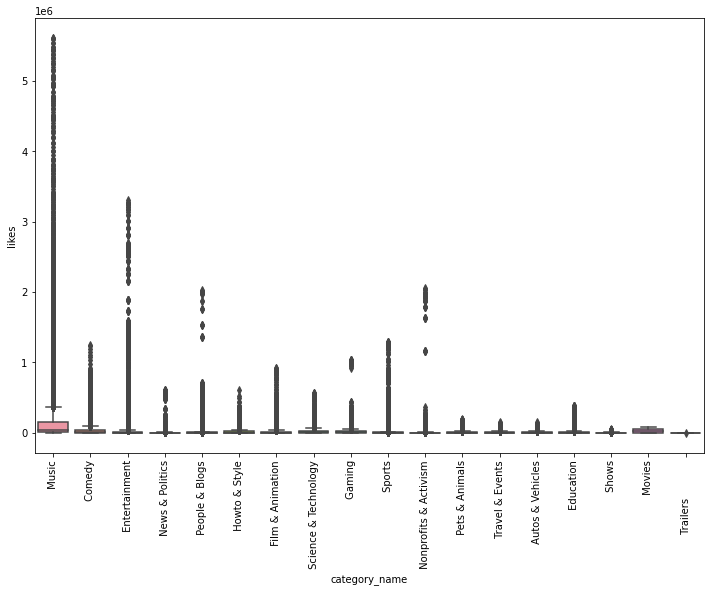

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation=90)

In [43]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'like_rate',
       'dislike_rate', 'comment_rate', 'category_name'],
      dtype='object')

In [44]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100

In [45]:
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100

In [46]:
full_df['comment_rate']=(full_df['comment_count']/full_df['views'])*100

In [49]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'like_rate',
       'dislike_rate', 'comment_rate', 'category_name'],
      dtype='object')

In [48]:
import plotly.graph_objs as go
from plotly.offline import iplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

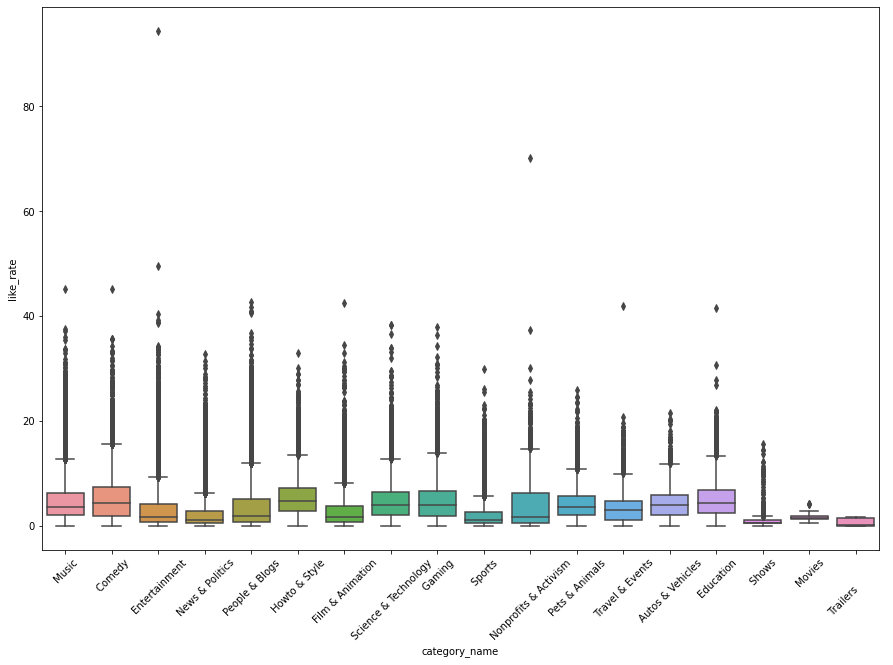

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='views', ylabel='likes'>

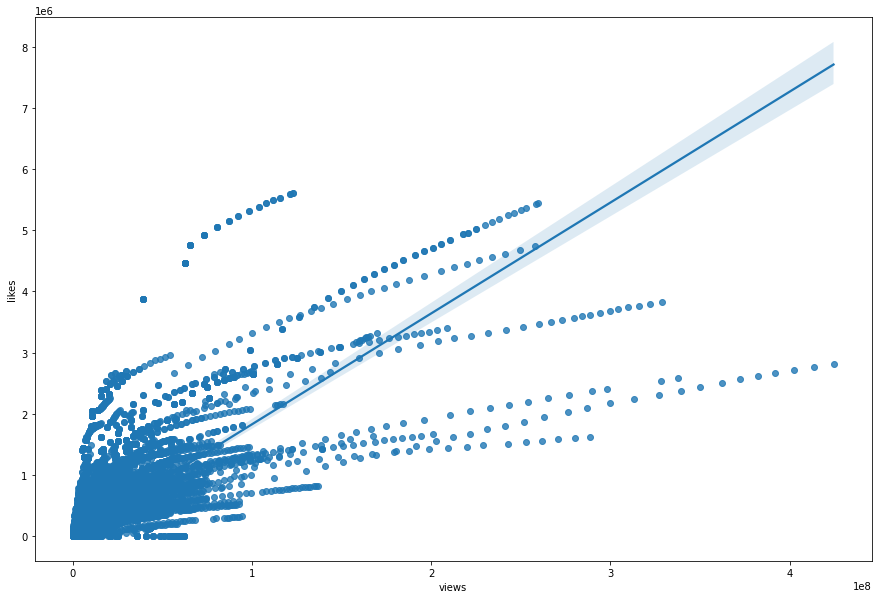

In [67]:
plt.figure(figsize=(15,10))
sns.regplot(data=full_df,x='views',y='likes')

<AxesSubplot:>

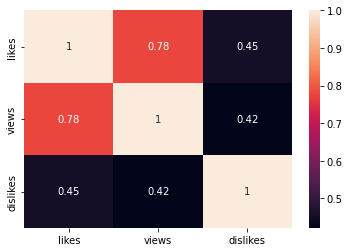

In [72]:
sns.heatmap(full_df[['likes','views','dislikes']].corr(),annot=True)


In [44]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA

In [58]:
visited_channel_df=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index()

In [73]:
visited_channel_df.columns=['channel','count']

In [74]:
visited_channel_df

channel  count
0      The Late Show with Stephen Colbert    984
1                                     WWE    804
2             Late Night with Seth Meyers    773
3                               VikatanTV    763
4                            TheEllenShow    743
...                                   ...    ...
37819                   LIGHTS - 001 jrny      1
37820                          bangtanist      1
37821                      LIGAMX Femenil      1
37822             LIGA COLOMBIANA OFICIAL      1
37823                    Pavel Sidorik TV      1

[37824 rows x 2 columns]

In [76]:
import plotly.express as px

In [79]:
px.bar(data_frame=visited_channel_df[0:20],x='count',y='channel',)

In [80]:
full_df.head(2)

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA

In [83]:
import string

In [84]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [112]:
punc_count=[]
count=0
for y in full_df['title']:
    for x in y:
        if x in string.punctuation:
            count=count+1
    punc_count.append(count)
    count=0
        

    

In [115]:
full_df['punc count']=punc_count

In [124]:
sample=full_df[0:100]

In [125]:
sample

video_id trending_date  \
0   n1WpP7iowLc      17.14.11   
1   0dBIkQ4Mz1M      17.14.11   
2   5qpjK5DgCt4      17.14.11   
3   d380meD0W0M      17.14.11   
4   2Vv-BfVoq4g      17.14.11   
..          ...           ...   
95  zxuvr9tN924      17.14.11   
96  dKBThyjj0J0      17.14.11   
97  pQgPR2V6924      17.14.11   
98  lHcXhBojpeQ      17.14.11   
99  Yo84eqYwP98      17.14.11   

                                                title  \
0         Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                       PLUSH - Bad Unboxing Fan Mail   
2   Racist Superman | Rudy Mancuso, King Bach & Le...   
3                            I Dare You: GOING BALD!?   
4         Ed Sheeran - Perfect (Official Music Video)   
..                                                ...   
95  éè¯å¿æ° å®æ´ç âå°æ±äºæâäº®ç...   
96  'Helping People' Sneak Peek Ep. 805 | The Walk...   
97  ãæèä¸çå¨å ±ãç¾åªçé
¸å·æ®ãå...   
98  ä¸å±TVBè¦å¸ï¼ææ£10å¹´éæ¢
ç«¹é¦¬é«®å¦...   
99  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...   

                                        channel_title  category_id  \
0                                          EminemVEVO           10   
1                                           iDubbbzTV           23   
2                                        Rudy Mancuso           23   
3                                            nigahiga           24   
4                                          Ed Sheeran           10   
..                                                ...          ...   
95  æ±èå«è§å®æ¹é¢éChina JiangsuTV Offici...           24   
96                                                amc           24   
97            æèçä¸çå¨å ± Sisy's World News           25   
98                                    ææç¾æç           22   
99                                            Le Labo           24   

                publish_time  \
0   2017-11-10T17:00:03.000Z   
1   2017-11-13T17:00:00.000Z   
2   2017-11-12T19:05:24.000Z   
3   2017-11-12T18:01:41.000Z   
4   2017-11-09T11:04:14.000Z   
..                       ...   
95  2017-11-11T16:00:04.000Z   
96  2017-11-13T03:00:01.000Z   
97  2017-11-12T07:09:51.000Z   
98  2017-11-12T12:49:50.000Z   
99  2017-11-12T15:00:02.000Z   

                                                 tags     views    likes  \
0   Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1   plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2   racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3   ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4   edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
..                                                ...       ...      ...   
95  æ±èå«è§|"éè¯å¿æ°"|"å§æ¯å®"|"å­é...    150974      220   
96  The Walking Dead|"episode 805"|"episode 5"|"Th...     70448     1538   
97  é³æè|"æèä¸çå¨å ±"|"æèä¸çè²...    135620      379   
98                                             [none]     88061       47   
99                                             [none]    432721    14053   

    dislikes  comment_count                                  thumbnail_link  \
0      43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1       1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2       5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4      21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
..       ...            ...                                             ...   
95        65            201  https://i.ytimg.com/vi/zxuvr9tN924/default.jpg   
96        25            315  https://i.ytimg.com/vi/dKBThyjj0J0/default.jpg   
97        86            449  https://i.ytimg.com/vi/pQgPR2V6924/default.jpg

In [126]:
import plotly.graph_objs as go

In [127]:
from plotly.offline import iplot

<AxesSubplot:xlabel='punc count', ylabel='views'>

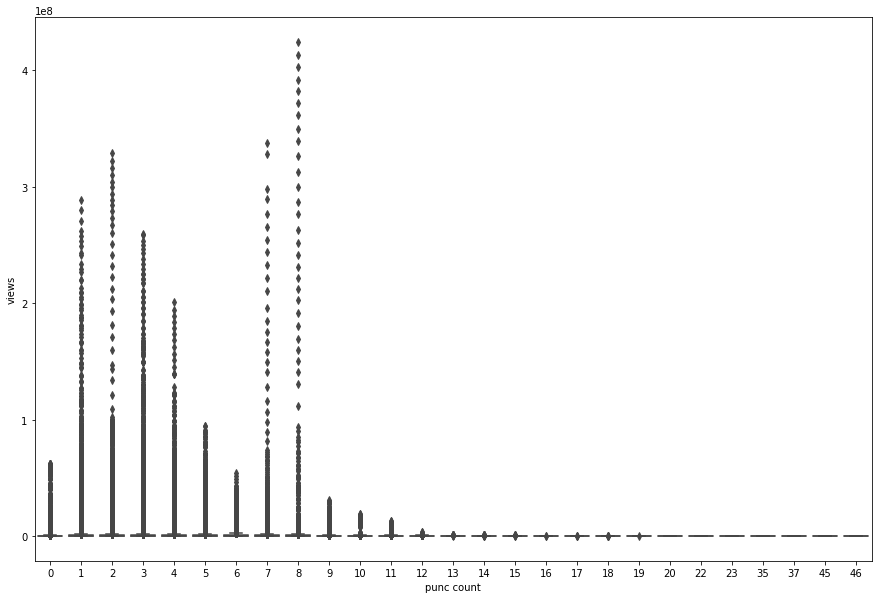

In [132]:
plt.figure(figsize=(15,10))
sns.boxplot(data=full_df,x='punc count',y='views')

In [134]:
full_df['punc count'].corr(full_df['views'])

0.046262236962134634